# Madhavi Ghanta
# DSC 540
# Week 5_6 Assignment


Complete the following exercises. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.

Data Wrangling with Python: Activity 7, page 207

Data Wrangling with Python: Activity 8, page 233

Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):

a. Name, Address, City, State, Zip, Phone Number

b. Add at least 10 rows of data and submit your code with a query generating your results.

Activity 7: Reading Tabular Data from a Web Page and Creating DataFrames In this activity, you have been given a Wikipedia page where you have the GDP of all countries listed. You have been asked to create three DataFrames from the three sources mentioned in the page (https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)):

Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structureimage.png

In [1]:
# Importing all the Python Packages for these 3 excercises

from bs4 import BeautifulSoup
import pandas as pd

# for sqlite DB
import sqlite3

# Task 1 create a soup with bs4 and load the data to work later on it

In [2]:
# used utf8 encoding to open the webpage

fd = open("List of countries by GDP (nominal) - Wikipedia.htm", "r", encoding='utf8')
soup = BeautifulSoup(fd)
fd.close()

# Task 2 How many tables are there?

In [3]:
# by using BeautifulSoup, getting all the tables 

Get_all_tables = soup.find_all("table")
lenghtoftables = len(Get_all_tables)
print("Total number of tables are {} ".format(lenghtoftables))

Total number of tables are 9 


#  Task 3 find the right table using the class attribute

In [4]:
data_table = soup.find("table", {"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>



# Task 4 Let's separate the source and the actual data

In [5]:
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print(len(sources_list))

3


In [6]:
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [7]:
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [8]:
len(data_tables)

3

# Task 5 Checking how to get the source names

In [9]:
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


# Task 6 Seperate the header and data for the first source

In [10]:
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

In [11]:
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [12]:
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [13]:
df1 = pd.DataFrame(data_rows1, columns=header1)

In [14]:
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


# Task 7 Do the same for the other two sources

In [15]:
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [16]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [17]:
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [18]:
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [19]:
df2 = pd.DataFrame(data_rows2, columns=header2)

In [20]:
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [21]:
# Now for the third one
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [22]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [23]:
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

In [24]:
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


# Data Wrangling with Python: Activity 8

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
df = pd.read_csv("visit_data.csv")
df.head(5)

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


# Task - 1 (Are there duplicates?)

In [27]:
print("First name is duplictaed - {}".format(any(df.first_name.duplicated())))
print("Last name is duplictaed - {}".format(any(df.last_name.duplicated())))
print("Email is duplictaed - {}".format(any(df.email.duplicated())))
print("gender is duplictaed - {}".format(any(df.gender.duplicated())))
print("ip_address is duplictaed - {}".format(any(df.ip_address.duplicated())))
print("visit is duplictaed - {}".format(any(df.visit.duplicated())))

First name is duplictaed - True
Last name is duplictaed - True
Email is duplictaed - False
gender is duplictaed - True
ip_address is duplictaed - False
visit is duplictaed - True


# Task - 2 (do any essential column contain NaN?)

In [28]:
# Notice that we have different ways to format boolean values for the % operator
print("The column Email contains NaN - %r " % df.email.isnull().values.any())
print("The column IP Address contains NaN - %s " % df.ip_address.isnull().values.any())
print("The column Visit contains NaN - %s " % df.visit.isnull().values.any())

The column Email contains NaN - False 
The column IP Address contains NaN - False 
The column Visit contains NaN - True 


# Task - 3 (Get rid of the outliers)

In [29]:
# There are various ways to do this. This is just one way. We encourage you to explore other ways.
# But before that we need to store the previous size of the data set and we will compare it with the new size
size_prev = df.shape
df = df[np.isfinite(df['visit'])] #This is an inplace operation. After this operation the original DataFrame is lost.
size_after = df.shape

# Task - 4 (Report the size difference)

In [30]:
# Notice how parameterized format is used and then the indexing is working inside the quote marks
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_prev, after=size_after))

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


# Task - 5 (Box plot visit to further check any Outliers)

{'whiskers': [<matplotlib.lines.Line2D at 0x2812cbff700>,
 'caps': [<matplotlib.lines.Line2D at 0x2812cbffd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2812cbff430>],
 'medians': [<matplotlib.lines.Line2D at 0x2812d2be280>],
 'fliers': [<matplotlib.lines.Line2D at 0x2812d2be550>],
 'means': []}

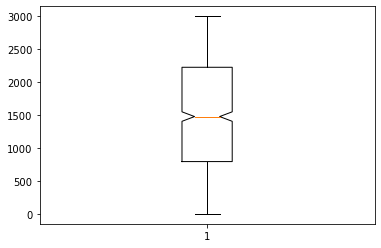

In [31]:
plt.boxplot(df.visit, notch=True)

In [32]:
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]  # Notice the powerful & operator
print("new data without outlier is - {}".format(*df1.shape))

new data without outlier is - 923


# Insert data into a SQL Lite database
a. Name, Address, City, State, Zip, Phone Number

In [33]:
# Creating Table
create_query = """
CREATE TABLE personal_detail
(Name VARCHAR(100), 
Address VARCHAR(500),
City VARCHAR(100), 
State VARCHAR(5),
Zip INTEGER,
Phone_Number VARCHAR(15)
);"""

con = sqlite3.connect(':memory:')
con.execute(create_query)
con.commit()

In [34]:
# Inserting Data
Insert_data = [
        ('Rob Cotton', '100 Main Road', 'Montpelier', 'VT', '55236', '4528693331'),
        ('Dan Mike', '200 Main Road', 'Montpelier', 'VT', '55236', '6528693332'),
        ('Mike R', '50 Main Road', 'Montpelier', 'VT', '55236', '9528693333'),
        ('Rak K', '10 Main Road', 'Montpelier', 'VT', '55236', '2528693334'),
        ('Donald T', '40 Main Road', 'Montpelier', 'VT', '55236', '7528693335'),
        ('Vijay R', '15 Main Road', 'Montpelier', 'VT', '55236', '1528693336'),
        ('Sylvia R', '500 Main Road', 'Montpelier', 'VT', '55236', '3528693338'),
        ('Deniss T', '29 Main Road', 'Montpelier', 'VT', '55236', '8528693323'),
        ('Michele V', '36 Main Road', 'Montpelier', 'VT', '55236', '4528693345'),
        ('Jan R', '69 Main Road', 'Montpelier', 'VT', '55236', '2528693751') ,
        ('Renee K', '82 Main Road', 'Montpelier', 'VT', '55236', '9528693831') 
    
]

insert_query = "INSERT INTO personal_detail VALUES(?, ?, ?, ?, ?, ?)"

con.executemany(insert_query, Insert_data)
con.commit()

In [35]:
cursor = con.execute ('select * from personal_detail')
rows  = cursor.fetchall()
rows

[('Rob Cotton', '100 Main Road', 'Montpelier', 'VT', 55236, '4528693331'),
 ('Dan Mike', '200 Main Road', 'Montpelier', 'VT', 55236, '6528693332'),
 ('Mike R', '50 Main Road', 'Montpelier', 'VT', 55236, '9528693333'),
 ('Rak K', '10 Main Road', 'Montpelier', 'VT', 55236, '2528693334'),
 ('Donald T', '40 Main Road', 'Montpelier', 'VT', 55236, '7528693335'),
 ('Vijay R', '15 Main Road', 'Montpelier', 'VT', 55236, '1528693336'),
 ('Sylvia R', '500 Main Road', 'Montpelier', 'VT', 55236, '3528693338'),
 ('Deniss T', '29 Main Road', 'Montpelier', 'VT', 55236, '8528693323'),
 ('Michele V', '36 Main Road', 'Montpelier', 'VT', 55236, '4528693345'),
 ('Jan R', '69 Main Road', 'Montpelier', 'VT', 55236, '2528693751'),
 ('Renee K', '82 Main Road', 'Montpelier', 'VT', 55236, '9528693831')]

# b. Add at least 10 rows of data and submit your code with a query generating your results.

In [36]:
import pandas.io.sql as sql
sql.read_sql('select * from personal_detail', con)

,Name,Address,City,State,Zip,Phone_Number
0,Rob Cotton,100 Main Road,Montpelier,VT,55236,4528693331
1,Dan Mike,200 Main Road,Montpelier,VT,55236,6528693332
2,Mike R,50 Main Road,Montpelier,VT,55236,9528693333
3,Rak K,10 Main Road,Montpelier,VT,55236,2528693334
4,Donald T,40 Main Road,Montpelier,VT,55236,7528693335
5,Vijay R,15 Main Road,Montpelier,VT,55236,1528693336
6,Sylvia R,500 Main Road,Montpelier,VT,55236,3528693338
7,Deniss T,29 Main Road,Montpelier,VT,55236,8528693323
8,Michele V,36 Main Road,Montpelier,VT,55236,4528693345
9,Jan R,69 Main Road,Montpelier,VT,55236,2528693751


In [38]:
# Closing the connection
con.close()